# Prediction of house price using Machine learning

In this project we are going to predict the price of house so this kind of problem is called as Regression  problem.

## Problem definition

>* How well can we predict price of house by using given data

## Data

>* train.csv - the training set
>* test.csv - the test set
>* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
>* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
>* for brif info visit-https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Evaluation
>* for this problem kaggle has set evaluation metrix to RMSE(Root mean squared error)between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Features
>* for feature info we have given a txt file which contains all features info 
>* or you can visit-https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### importing data analysis tools

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# to see plot in notebook 
%matplotlib inline

### importing  data 

In [156]:
train_df = pd.read_csv("D:\Machine_learning/MACHINE_LEARN/PROJECTS/House_price_prediction/Data/train.csv")

In [157]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

In [158]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [159]:
len(train_df)

1460

In [160]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:ylabel='Frequency'>

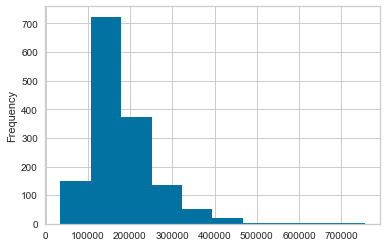

In [161]:
# visualize our target
train_df.SalePrice.plot.hist()

In [162]:
train_df.T

0       1       2        3       4       5       6     \
Id                  1       2       3        4       5       6       7   
MSSubClass         60      20      60       70      60      50      20   
MSZoning           RL      RL      RL       RL      RL      RL      RL   
LotFrontage      65.0    80.0    68.0     60.0    84.0    85.0    75.0   
LotArea          8450    9600   11250     9550   14260   14115   10084   
...               ...     ...     ...      ...     ...     ...     ...   
MoSold              2       5       9        2      12      10       8   
YrSold           2008    2007    2008     2006    2008    2009    2007   
SaleType           WD      WD      WD       WD      WD      WD      WD   
SaleCondition  Normal  Normal  Normal  Abnorml  Normal  Normal  Normal   
SalePrice      208500  181500  223500   140000  250000  143000  307000   

                 7        8       9       10       11      12       13    \
Id                  8        9      10      11       12      13       14   
MSSubClass         60       50     190      20       60      20       20   
MSZoning           RL       RM      RL      RL       RL      RL       RL   
LotFrontage       NaN     51.0    50.0    70.0     85.0     NaN     91.0   
LotArea         10382     6120    7420   11200    11924   12968    10652   
...               ...      ...     ...     ...      ...     ...      ...   
MoSold             11        4       1       2        7       9        8   
YrSold           2009     2008    2008    2008     2006    2008     2007   
SaleType           WD       WD      WD      WD      New      WD      New   
SaleCondition  Normal  Abnorml  Normal  Normal  Partial  Normal  Partial   
SalePrice      200000   129900  118000  129500   345000  144000   279500   

                 14      15      16      17      18       19       20    \
Id                 15      16      17      18      19       20       21   
MSSubClass         20      45      20      90      20       20       60   
MSZoning           RL      RM      RL      RL      RL       RL       RL   
LotFrontage       NaN    51.0     NaN    72.0    66.0     70.0    101.0   
LotArea         10920    6120   11241   10791   13695     7560    14215   
...               ...     ...     ...     ...     ...      ...      ...   
MoSold              5       7       3      10       6        5       11   
YrSold           2008    2007    2010    2006    2008     2009     2006   
SaleType           WD      WD      WD      WD      WD      COD      New   
SaleCondition  Normal  Normal  Normal  Normal  Normal  Abnorml  Partial   
SalePrice      157000  132000  149000   90000  159000   139000   325300   

                 21      22      23      24      25      26      27      28    \
Id                 22      23      24      25      26      27      28      29   
MSSubClass         45      20     120      20      20      20      20      20   
MSZoning           RM      RL      RM      RL      RL      RL      RL      RL   
LotFrontage      57.0    75.0    44.0     NaN   110.0    60.0    98.0    47.0   
LotArea          7449    9742    4224    8246   14230    7200   11478   16321   
...               ...     ...     ...     ...     ...     ...     ...     ...   
MoSold              6       9       6       5       7       5       5      12   
YrSold           2007    2008    2007    2010    2009    2010    2010    2006   
SaleType           WD      WD      WD      WD      WD      WD      WD      WD   
SaleCondition  Normal  Normal  Normal  Normal  Normal  Normal  Normal  Normal   
SalePrice      139400  230000  129900  154000  256300  134800  306000  207500   

                 29       30      31      32      33      34      35    \
Id                 30       31      32      33      34      35      36   
MSSubClass         30       70      20      20      20     120      60   
MSZoning           RM  C (all)      RL      RL      RL      RL      RL   
LotFrontage      60.0     50.0     NaN    85.

In [163]:
### Check unique values
len(train_df.MSZoning.unique())

5

In [226]:
len(train_df.Id.unique())

1460

**Note**- Usually we will drop column with same no. of uniques as len of df but here we will keep this beause will needd this for kaggle submission

In [164]:
train_df.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [165]:

# list of variables that contain year information
year_feature = [feature for feature in train_df.columns if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

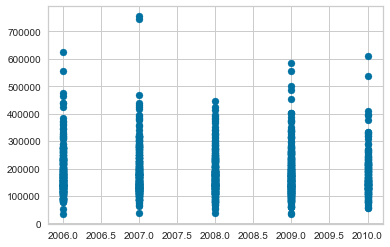

In [166]:
plt.scatter(x=train_df.YrSold, y=train_df.SalePrice)

### Numeric features

In [167]:
numeric_features=[]
for lable, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
     numeric_features.append(lable)
    
numeric_features    

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [168]:
numeric_visual = [feature for feature in numeric_features if len(train_df[feature].unique())<25 and feature not in year_feature ]

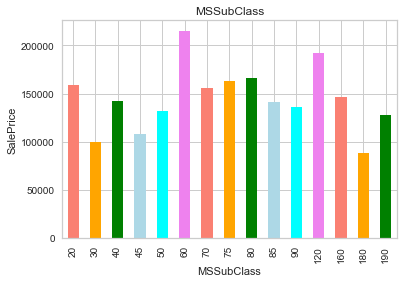

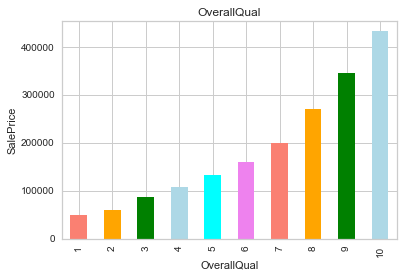

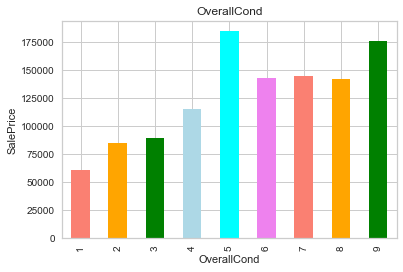

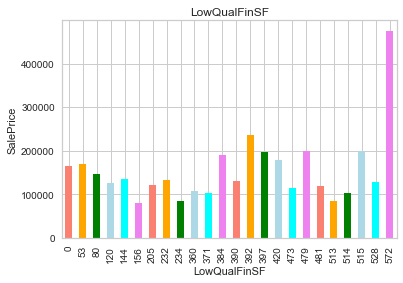

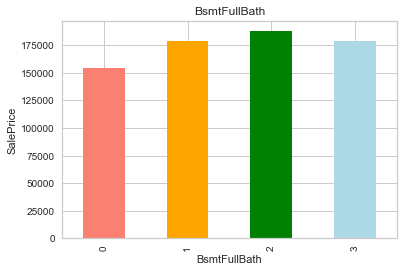

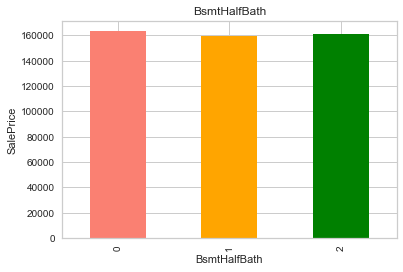

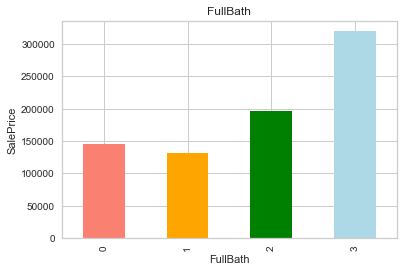

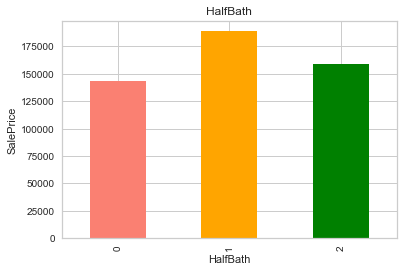

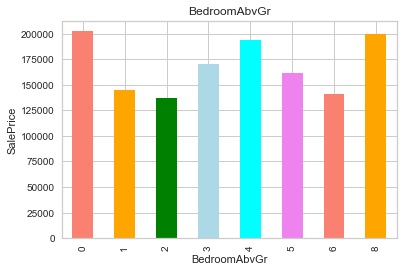

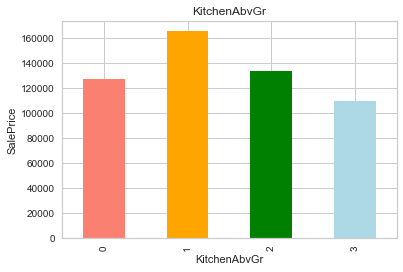

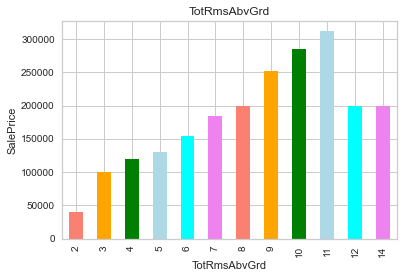

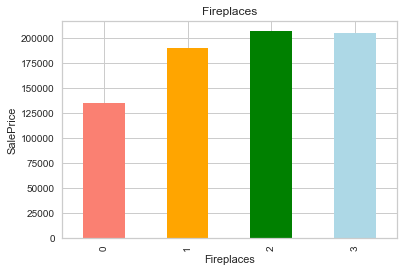

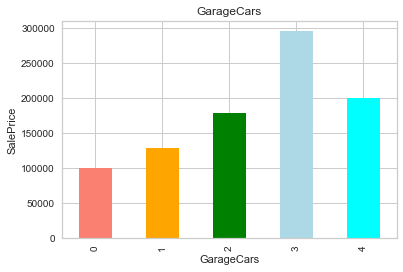

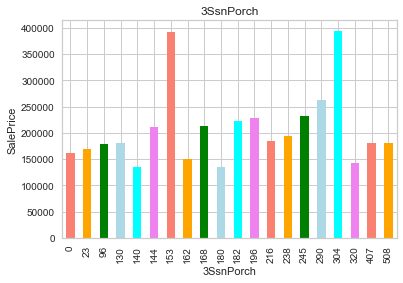

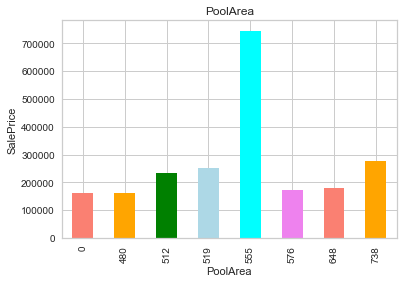

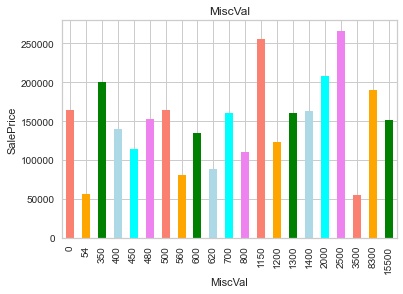

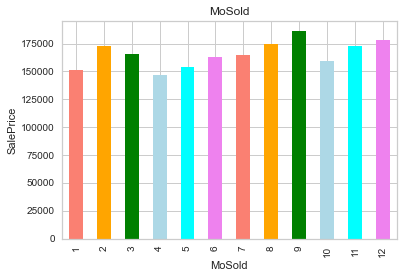

In [169]:
for feature in numeric_visual:
    tmp_data = train_df.copy()
    tmp_data.groupby(feature)['SalePrice'].median().plot.bar(color=['salmon', 'orange', 'green', 'lightblue', 'cyan', 'violet'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [170]:
continuous_features = [features for features in numeric_features if features not in numeric_visual+year_feature+['Id']]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

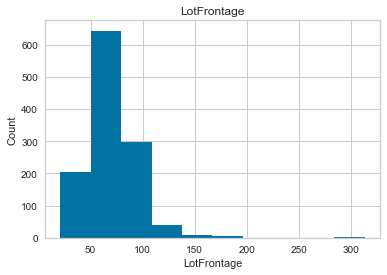

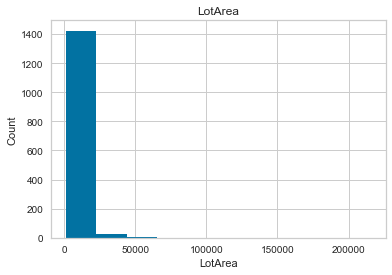

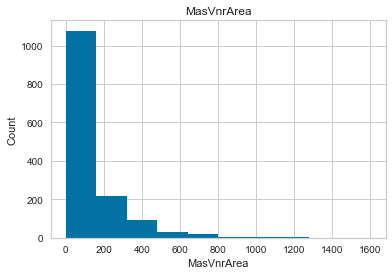

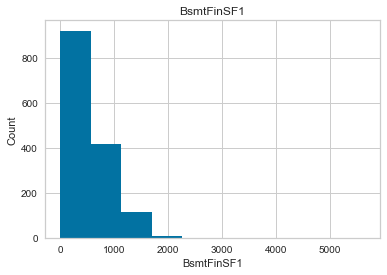

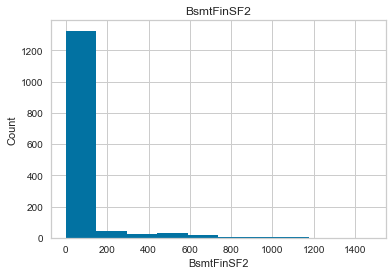

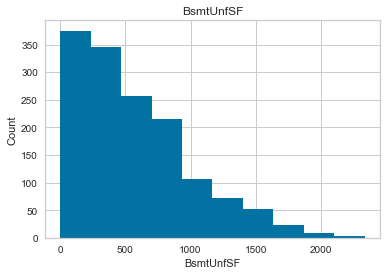

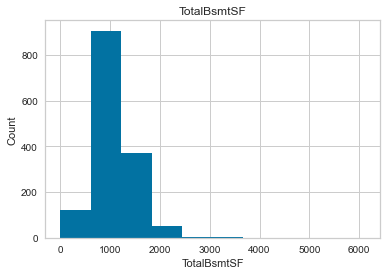

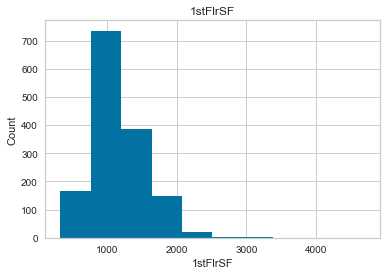

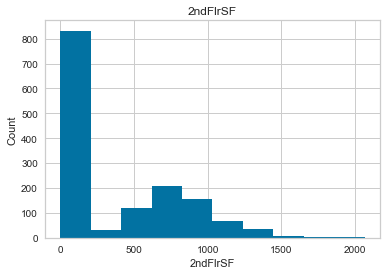

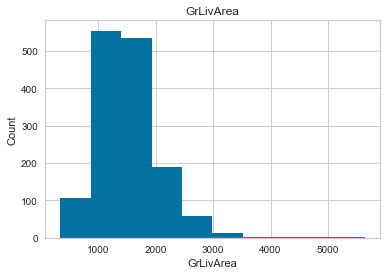

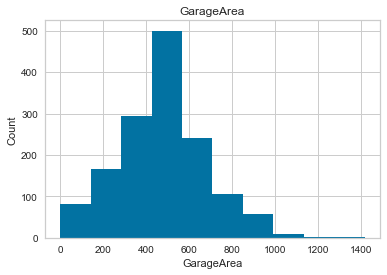

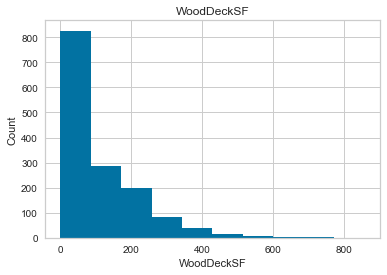

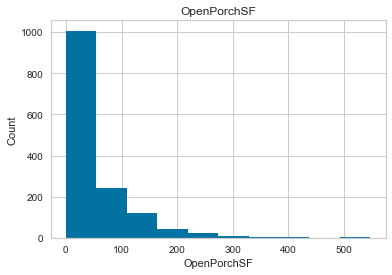

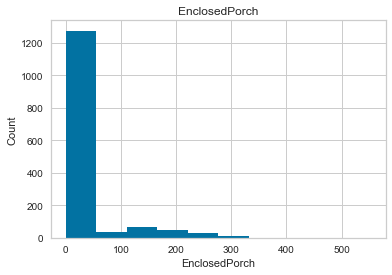

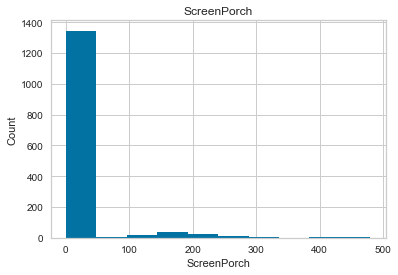

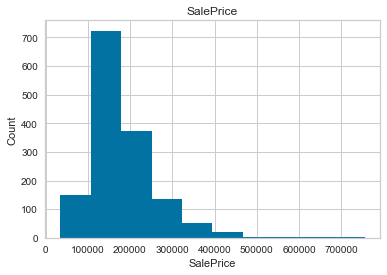

In [171]:
for feature in continuous_features:
    tmp1_data = train_df.copy()
    tmp1_data[feature].hist()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Categorical features

In [172]:
categorical_features = []
for lable, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        categorical_features.append(lable)
        
categorical_features    

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [173]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Engineering

In [174]:
pd.pandas.set_option('display.max_columns',None)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )

LotFrontage is missing 17.73972602739726 % of data
Alley is missing 93.76712328767123 % of data
MasVnrType is missing 0.547945205479452 % of data
MasVnrArea is missing 0.547945205479452 % of data
BsmtQual is missing 2.5342465753424657 % of data
BsmtCond is missing 2.5342465753424657 % of data
BsmtExposure is missing 2.6027397260273974 % of data
BsmtFinType1 is missing 2.5342465753424657 % of data
BsmtFinType2 is missing 2.6027397260273974 % of data
Electrical is missing 0.0684931506849315 % of data
FireplaceQu is missing 47.26027397260274 % of data
GarageType is missing 5.5479452054794525 % of data
GarageYrBlt is missing 5.5479452054794525 % of data
GarageFinish is missing 5.5479452054794525 % of data
GarageQual is missing 5.5479452054794525 % of data
GarageCond is missing 5.5479452054794525 % of data
PoolQC is missing 99.52054794520548 % of data
Fence is missing 80.75342465753424 % of data
MiscFeature is missing 96.30136986301369 % of data


#### **NOTE**- here some columns missing more than 90% of data we will drop them
>* PoolQC
>* MiscFeature
>* Alley

In [176]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [177]:
for feature in train_df.columns:
   print(f'{feature} is having {len(train_df[feature].unique())} unique values')


Id is having 1460 unique values
MSSubClass is having 15 unique values
MSZoning is having 5 unique values
LotFrontage is having 111 unique values
LotArea is having 1073 unique values
Street is having 2 unique values
Alley is having 3 unique values
LotShape is having 4 unique values
LandContour is having 4 unique values
Utilities is having 2 unique values
LotConfig is having 5 unique values
LandSlope is having 3 unique values
Neighborhood is having 25 unique values
Condition1 is having 9 unique values
Condition2 is having 8 unique values
BldgType is having 5 unique values
HouseStyle is having 8 unique values
OverallQual is having 10 unique values
OverallCond is having 9 unique values
YearBuilt is having 112 unique values
YearRemodAdd is having 61 unique values
RoofStyle is having 6 unique values
RoofMatl is having 8 unique values
Exterior1st is having 15 unique values
Exterior2nd is having 16 unique values
MasVnrType is having 5 unique values
MasVnrArea is having 328 unique values
ExterQ

### Dropping columns

In [178]:
train_df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Missing values

In [179]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### **NOTE**-Numeric_columns are not missing much values so will just fill with median 

In [180]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_df[label]= train_df.fillna(content.median())

In [181]:
for label, content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [182]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(f'{label} = {content.dtype}')

MSZoning = object
LotFrontage = object
Street = object
LotShape = object
LandContour = object
Utilities = object
LotConfig = object
LandSlope = object
Neighborhood = object
Condition1 = object
Condition2 = object
BldgType = object
HouseStyle = object
RoofStyle = object
RoofMatl = object
Exterior1st = object
Exterior2nd = object
MasVnrType = object
MasVnrArea = object
ExterQual = object
ExterCond = object
Foundation = object
BsmtQual = object
BsmtCond = object
BsmtExposure = object
BsmtFinType1 = object
BsmtFinType2 = object
Heating = object
HeatingQC = object
CentralAir = object
Electrical = object
KitchenQual = object
Functional = object
FireplaceQu = object
GarageType = object
GarageYrBlt = object
GarageFinish = object
GarageQual = object
GarageCond = object
PavedDrive = object
Fence = object
SaleType = object
SaleCondition = object


#### one way to convert non numeric data into numbers is to convert it into pandas category 

In [183]:
for label, content in train_df.items():
    if pd.api.types.is_string_dtype(content):
       train_df[label] = content.astype("category")

In [184]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   category
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

#### to check the codes of category use following
* NOTE *- pandas category fills NaN with -1 

In [185]:
train_df.GarageType.cat.codes

0       1
1       1
2       1
3       5
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Length: 1460, dtype: int8

In [186]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )

MasVnrType is missing 0.547945205479452 % of data
BsmtQual is missing 2.5342465753424657 % of data
BsmtCond is missing 2.5342465753424657 % of data
BsmtExposure is missing 2.6027397260273974 % of data
BsmtFinType1 is missing 2.5342465753424657 % of data
BsmtFinType2 is missing 2.6027397260273974 % of data
Electrical is missing 0.0684931506849315 % of data
FireplaceQu is missing 47.26027397260274 % of data
GarageType is missing 5.5479452054794525 % of data
GarageFinish is missing 5.5479452054794525 % of data
GarageQual is missing 5.5479452054794525 % of data
GarageCond is missing 5.5479452054794525 % of data
Fence is missing 80.75342465753424 % of data


### we need to ssee all columns so use Ipython module

In [187]:
pd.get_option("display.max_columns",None)

In [188]:
pd.set_option("display.max_columns",None)

In [189]:
pd.get_option("display.max_columns")

In [190]:
display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,1,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,2,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,2,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,2,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,3,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,3,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,3,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,4,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,4,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,4,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,5,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,5,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,1456,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,1456,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1456,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,1457,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,1457,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1457,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,1458,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,1458,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1458,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,1459,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,1459,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1459,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,0,4,2010,WD,Normal,142125


### convert category ie. non integer to integer

In [191]:
for label, content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_df[label] = pd.Categorical(content).codes+1

In [192]:
display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,1,8450,2,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,1,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,1,2,2,548,5,5,3,0,61,0,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,2,9600,2,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,2,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,2,2,2,460,5,5,3,298,0,0,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,3,11250,2,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,3,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,3,2,2,608,5,5,3,0,42,0,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,4,9550,2,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,4,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,4,3,3,642,5,5,3,0,35,272,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,5,14260,2,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,5,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,5,2,3,836,5,5,3,192,84,0,0,0,0,0,0,12,2008,9,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,1456,7917,2,4,4,1,5,1,9,3,3,1,6,6,5,1999,2000,2,2,13,14,3,1456,4,5,3,3,4,4,6,0,6,0,953,953,2,1,2,5,953,694,0,1647,0,0,2,1,3,1,4,7,7,1,5,2,1456,2,2,460,5,5,3,0,40,0,0,0,0,0,0,8,2007,9,5,175000
1456,1457,20,4,1457,13175,2,4,4,1,5,1,15,3,3,1,3,6,6,1978,1988,2,2,10,11,4,1457,4,5,2,3,4,4,1,790,5,163,589,1542,2,5,2,5,2073,0,0,2073,1,0,2,0,3,1,4,7,3,2,5,2,1457,3,2,500,5,5,3,349,0,0,0,0,0,3,0,2,2010,9,5,210000
1457,1458,70,4,1458,9042,2,4,4,1,5,1,7,3,3,1,6,7,9,1941,2006,2,2,6,6,3,1458,1,3,5,4,2,4,3,275,6,0,877,1152,2,1,2,5,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,3,2,1458,2,1,252,5,5,3,0,60,0,0,0,0,1,2500,5,2010,9,5,266500
1458,1459,20,4,1459,9717,2,4,4,1,5,1,13,3,3,1,3,5,6,1950,1996,4,2,9,9,3,1459,4,5,2,4,4,3,3,49,5,1029,0,1078,2,3,2,1,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,0,2,1459,3,1,240,5,5,3,366,0,112,0,0,0,0,0,4,2010,9,5,142125


In [193]:
for feature in train_df.columns:
    if train_df[feature].isnull().sum()/len(train_df)>0.0:
        print(f'{feature} is missing {train_df[feature].isnull().sum()/len(train_df)*100} % of data' )

**NOTE**-  Nothing got printed means we dont have any null values

### Feature selection
>* Usually we do feature selection after splitting data into train and test but here we are doing this before beause we have diffrent test set

In [194]:
train_df.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,1.000000,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.041925,1.000000,0.001689,0.029826,0.008514,0.047012,0.008128,-0.021390,0.015973,-0.005024,0.038448,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.032392,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,-0.001108,0.003453,1.000000,0.000034,0.016570,0.017634,0.010732,0.005117,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.013202,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,0.011156,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.022693,0.011156,-0.017161,-0.003254,0.058126,-0.045282,-0.021027,-0.066625,0.008407,-0.069836,0.020935,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.049829,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,-0.010293,0.063761,0.011156,-0.052038,-0.040110,-0.098672,-0.073844,-0.078145,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.108141,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.006096,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,0.004480,-0.006096,0.200536,-0.096041,-0.235174,0.102637,-0.017244,0.027356,0.017286,-0.049128,-0.032210,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070196,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.020596,0.093439,-0.006096,0.101357,-0.157042,-0.189250,-0.125427,-0.090149,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.066785,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,1.000000,0.011156,-0.006096,1.000000,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.041925,1.000000,0.001689,0.029826,0.008514,0.047012,0.008128,-0.021390,0.015973,-0.005024,0.038448,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.032392,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,-0.001108,0.003453,1.000000,0.000034,0.016570,0.017634,0.010732,0.005117,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.013202,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
LotArea,-0.033226,-0.139781,-0.034452,-0.033226,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.

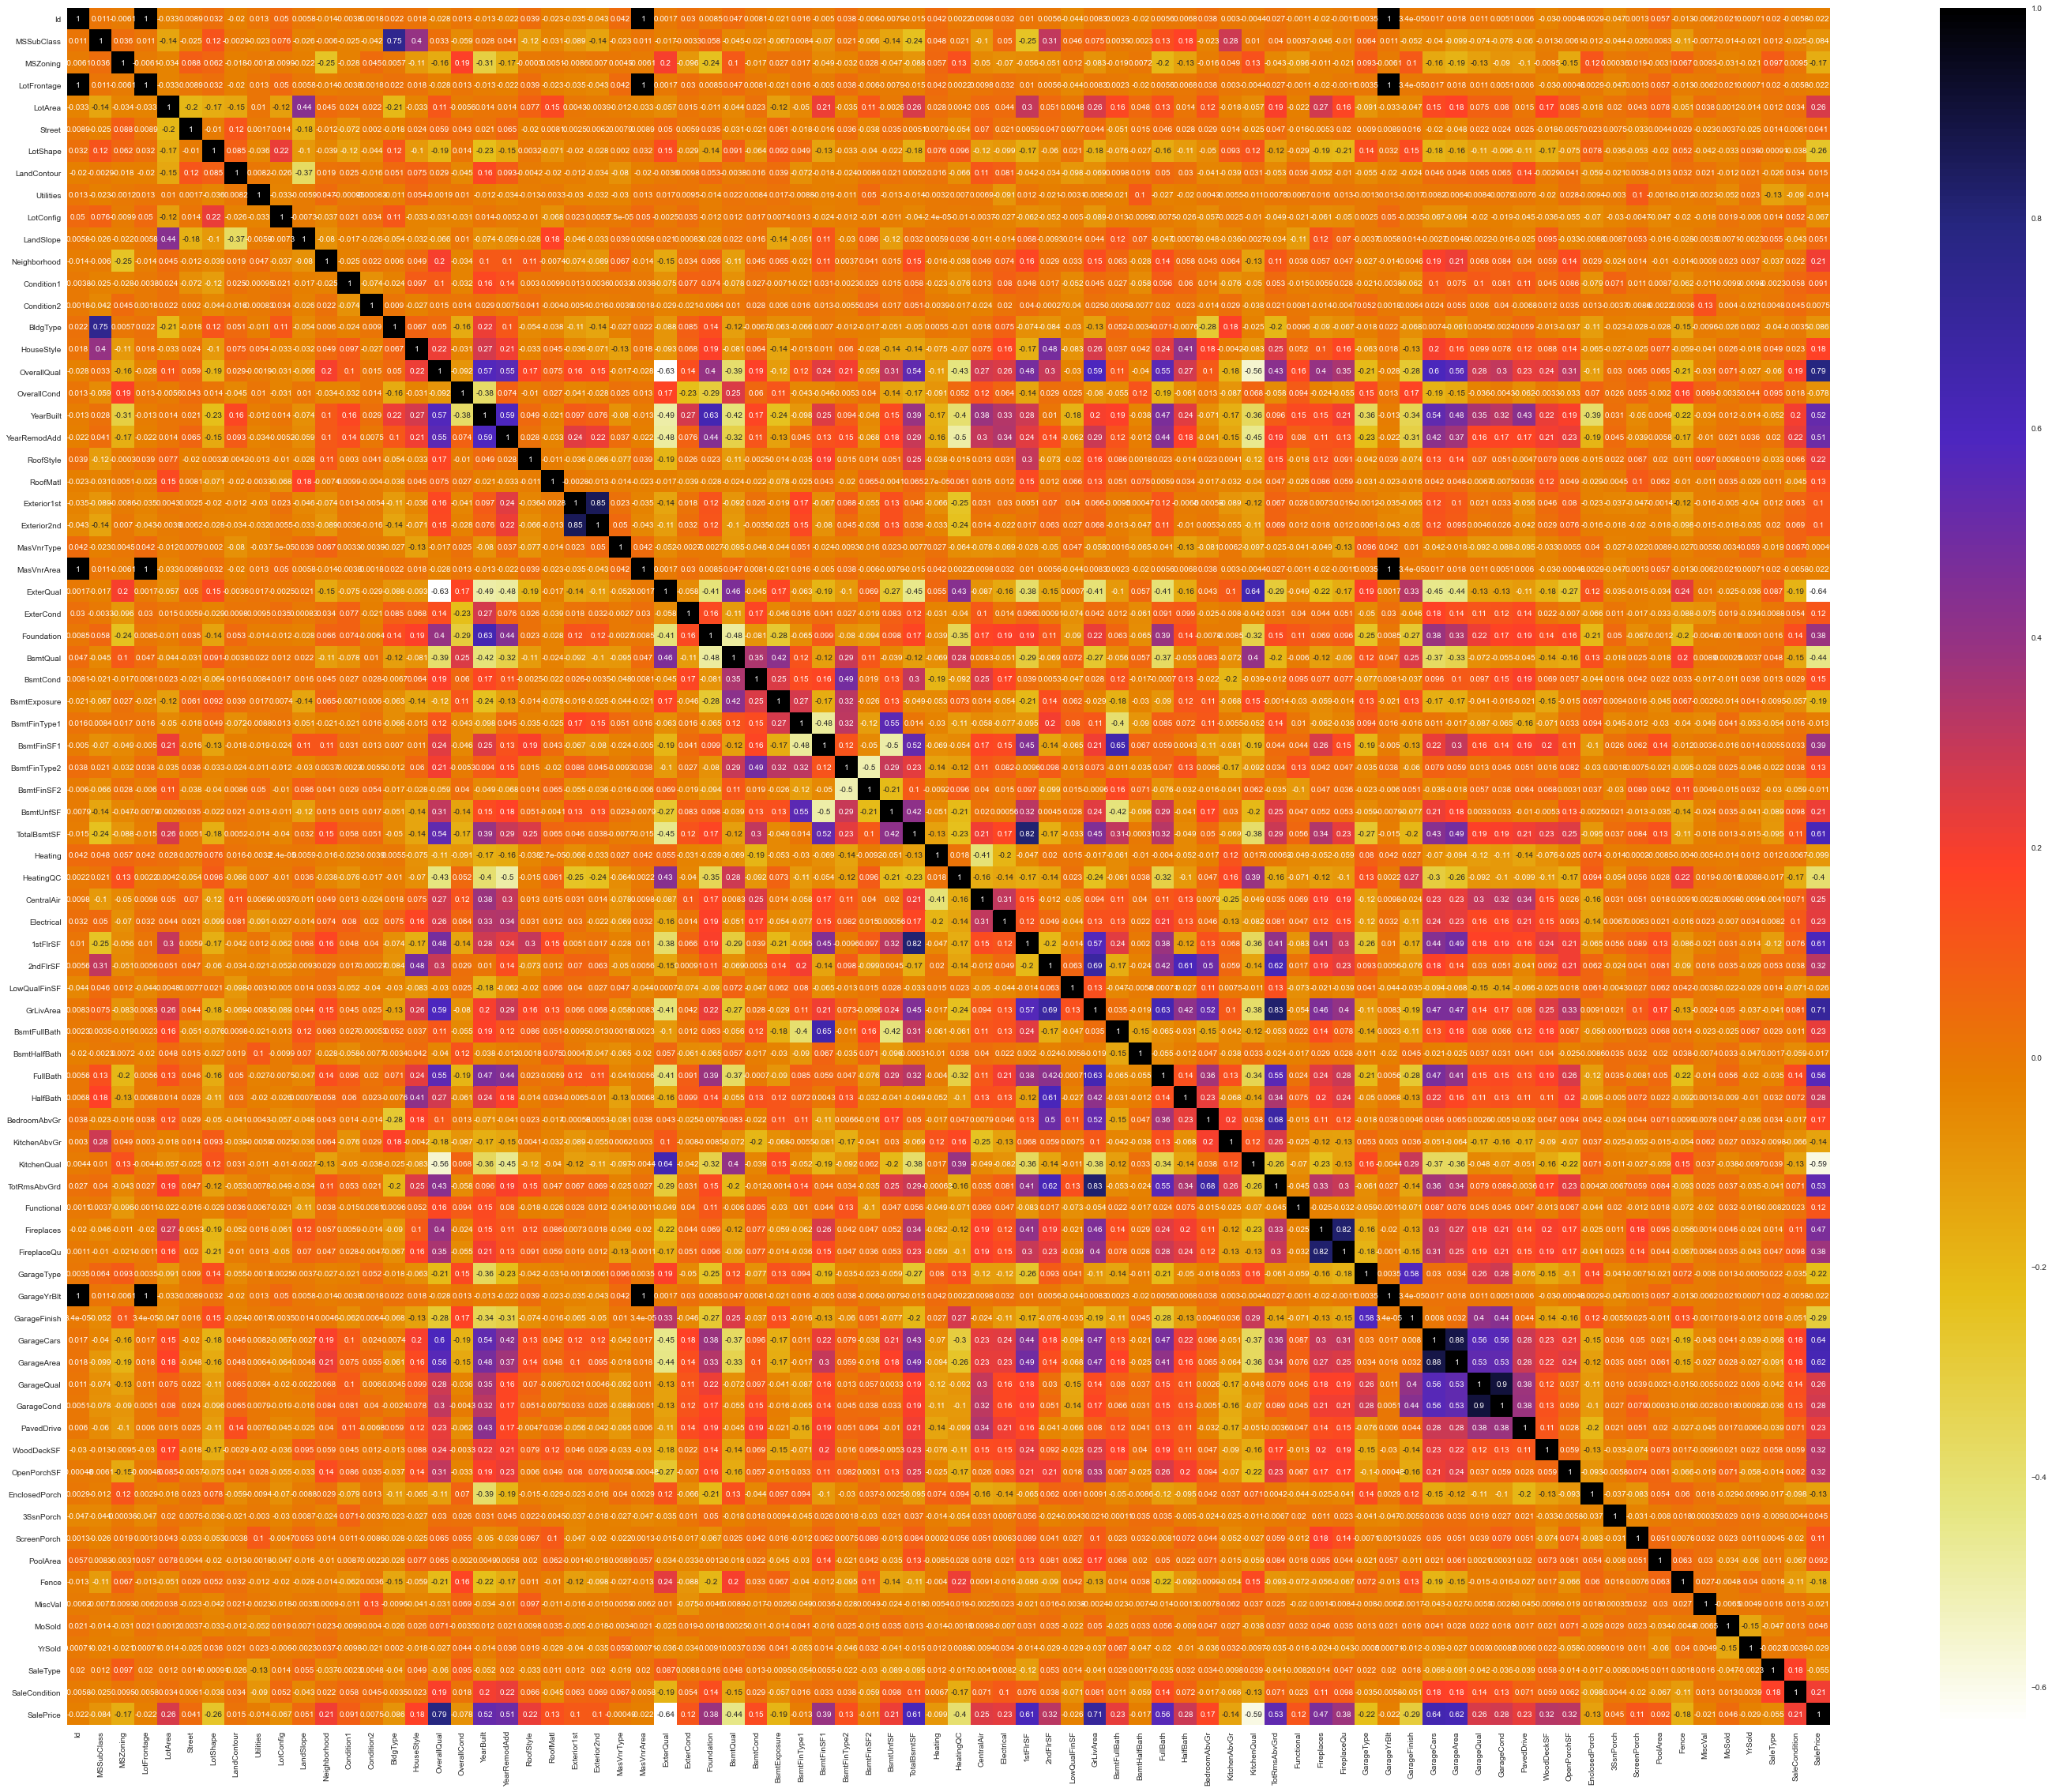

In [195]:
plt.figure(figsize=(50,40))
corr =train_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [196]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [197]:

corr_features = correlation(train_df, 0.90)
corr_features

{'GarageCond', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea'}

**note** after dropping correlated features r^2 of validation decrese so I will not drop them 

### Now we have all data in numaric format splitt data

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
# split data into features and labels 

X= train_df.drop("SalePrice",axis=1)
y=train_df["SalePrice"]

# we will split it into train and validation set
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.30)


# Build model
>* here we will try following models
>>* Lasso 
>>* Random forest
>>* XGboost


In [200]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from yellowbrick.regressor import residuals_plot

### Creating function for checking scores of diffrent models
>* I have 1460 rows so will use bellow fuction directly if we have dataset with more sample then this fuction will take lot of time so we would have gven only sample of dataset for testing models

In [201]:
models_dict = {'Lasso':Lasso(),
               'Random forest': RandomForestRegressor(),
               'XGB': XGBRegressor()}

In [202]:
def model_scores(model,X_train,X_val,y_train,y_val):
    # set random seed
    np.random.seed(0)
    model_score={}
    
    for name,model in model.items():
        model.fit(X_train,y_train)
    
        model_score[name]=model.score(X_val,y_val)
        
    return model_score    
    

In [203]:
# check score of trained model
model_scores = model_scores(models_dict,X_train,X_val,y_train,y_val)
model_scores

{'Lasso': 0.8479173821543742,
 'Random forest': 0.8774342858187443,
 'XGB': 0.8738468254337219}

<AxesSubplot:>

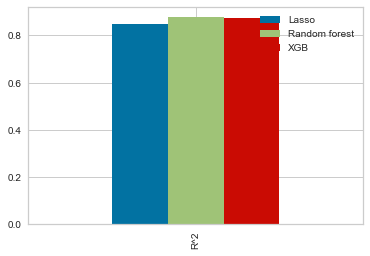

In [204]:
scores_df = pd.DataFrame(model_scores, index =["R^2"])
scores_df.plot.bar()

#### Building evaluation model we want root mean squared error but we  have mean squared error so we will create function which will return the RMSE

In [205]:
from sklearn.metrics import mean_squared_error,r2_score
def rmse(y_preds,y_val):
    return np.sqrt(mean_squared_error(y_preds,y_val))

def show_all_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    score={"training MSE":mean_squared_error(train_preds,y_train),
           "validation MSE":mean_squared_error(val_preds,y_val),
           "training RMSE":rmse(train_preds,y_train),
           "validation RMSE":rmse(val_preds,y_val),
            "training R^2":r2_score(train_preds,y_train),
           "validation R^2":r2_score(val_preds,y_val) }
    return score
    

### now we will check scores of models for above metrics
#### Lasso

In [206]:
# for Lasso

lasso_model= Lasso()
lasso_model.fit(X_train,y_train)

# to check score we will call our fuction
show_all_scores(lasso_model)


{'training MSE': 1022245197.9358093,
 'validation MSE': 960516319.3319969,
 'training RMSE': 31972.56946095839,
 'validation RMSE': 30992.197717038347,
 'training R^2': 0.8063078552166725,
 'validation R^2': 0.8135834668857053}

#### Random forest

In [207]:
random_model = RandomForestRegressor()
random_model.fit(X_train, y_train)
show_all_scores(random_model)


{'training MSE': 133770089.49389696,
 'validation MSE': 758162477.4016336,
 'training RMSE': 11565.902018169485,
 'validation RMSE': 27534.750360256287,
 'training R^2': 0.9761481195562569,
 'validation R^2': 0.8379037112510985}

#### XGB

In [208]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,y_train)
show_all_scores(XGB_model)

{'training MSE': 809111.5743271591,
 'validation MSE': 796752348.3153495,
 'training RMSE': 899.5062947679461,
 'validation RMSE': 28226.80194983749,
 'training R^2': 0.9998713444971004,
 'validation R^2': 0.8382646779798032}

# Hypertunning

In [209]:
#  try tuining with following params for random forest:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
            }

## we will do this with randomizedsearch cv

#### Random forest

In [210]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [211]:


rf_model=  RandomizedSearchCV(RandomForestRegressor(random_state=0),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=1)

rf_model.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=1)

In [212]:
rf_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 10}

In [213]:
show_all_scores(rf_model)

{'training MSE': 673830905.748809,
 'validation MSE': 900230504.6477118,
 'training RMSE': 25958.253133614537,
 'validation RMSE': 30003.841498176724,
 'training R^2': 0.8428617688264168,
 'validation R^2': 0.7730086000764104}

#### XGBRegressor

In [214]:
xgb_grid = {'learning_rate': [0.01,0.05,0.5,0.03],
 'max_depth': [4,6,8,10],
 'gamma':[0,1,2]}

In [215]:
%%time
xgb_randomcv = RandomizedSearchCV(XGBRegressor(),
                              param_distributions=xgb_grid,
                              n_iter=20,
                              cv=5,
                              verbose=0)
xgb_randomcv.fit(X_train, y_train);

Wall time: 24.4 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [216]:
xgb_randomcv.best_params_

{'max_depth': 6, 'learning_rate': 0.05, 'gamma': 2}

In [217]:
show_all_scores(xgb_randomcv)

{'training MSE': 62425462.6737742,
 'validation MSE': 754743960.6276507,
 'training RMSE': 7900.978589628895,
 'validation RMSE': 27472.603819580894,
 'training R^2': 0.989405991669004,
 'validation R^2': 0.84278006302717}

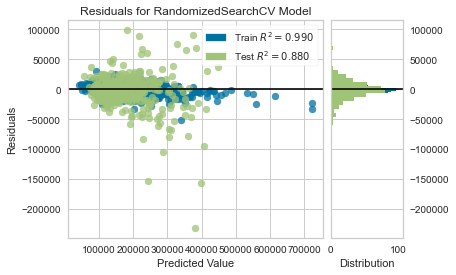

In [218]:
residuals_plot(xgb_randomcv,X_train, y_train, X_val, y_val);

### XGB has given best score will do Grid search on updated params_grid

In [219]:
xgb2_grid = {'learning_rate': [0.01,0.05,0.5,0.03],
 'max_depth': [5,6,7,10],
 'gamma':[0,1],
 'reg_lambda':[0,5,10]}

In [220]:
# here we are using subsample-0.9 and colsample_bytree-0.5 to overcome overfitting
# for each tree it will use random 90% of data and only 50% of columns and its speeds things up also

xgb_grid_model = GridSearchCV(XGBRegressor(subsample=0.9,colsample_bytree=0.5),
                        param_grid=xgb2_grid,
                       cv=4)

In [221]:
xgb_grid_model.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.5,
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=0.9,
                                    tree_method=None, validate_parame

In [222]:
xgb_grid_model.best_params_

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'reg_lambda': 0}

In [223]:
show_all_scores(xgb_grid_model)

{'training MSE': 39181039.651993096,
 'validation MSE': 701330156.6316695,
 'training RMSE': 6259.475988610636,
 'validation RMSE': 26482.638777728884,
 'training R^2': 0.9934744622573,
 'validation R^2': 0.8537858182604373}

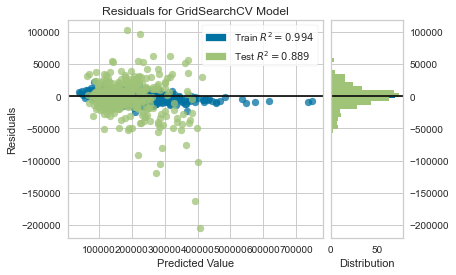

In [224]:
residuals_plot(xgb_grid_model,X_train, y_train, X_val, y_val);

## Best model

In [227]:
best_model = XGBRegressor(gamma= 0,
                          learning_rate= 0.05,
                          max_depth =6,
                          reg_lambda= 0,
                          subsample=0.9,colsample_bytree=0.5)
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [228]:
show_all_scores(best_model)

{'training MSE': 39181039.651993096,
 'validation MSE': 701330156.6316695,
 'training RMSE': 6259.475988610636,
 'validation RMSE': 26482.638777728884,
 'training R^2': 0.9934744622573,
 'validation R^2': 0.8537858182604373}

#### Save best model

In [127]:
import pickle
pickle.dump(best_model, open('D:\Machine_learning/MACHINE_LEARN/PROJECTS/House_price_prediction/saved_model/best_xgb.sva',
                             'wb'))

## Import the test dataset

In [229]:
df_test= pd.read_csv("D:\Machine_learning/MACHINE_LEARN/PROJECTS/House_price_prediction/Data/test.csv")
(df_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [129]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## DO Same preprocessing as train set

In [230]:
df_test.drop(['PoolQC','MiscFeature','Alley'],
             axis=1, inplace=True)

In [231]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]= content.astype("category")

In [232]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   LotShape       1459 non-null   category
 7   LandContour    1459 non-null   category
 8   Utilities      1457 non-null   category
 9   LotConfig      1459 non-null   category
 10  LandSlope      1459 non-null   category
 11  Neighborhood   1459 non-null   category
 12  Condition1     1459 non-null   category
 13  Condition2     1459 non-null   category
 14  BldgType       1459 non-null   category
 15  HouseStyle     1459 non-null   category
 16  OverallQual    1459 non-null   int64   
 17  OverallCond    1459 non-null   in

**Note** - our test data is not clean so clean ot first then make predictions

In [233]:
for label, content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label]=content.fillna(content.median())
                
for label, content in df_test.items():         
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label]= pd.Categorical(content).codes+1
            
        

In [234]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,3,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,3,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,5,3,3,4,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,0,1,2010,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,21.0,1936,2,4,4,1,5,1,11,3,3,4,5,4,7,1970,1970,2,1,6,6,3,0.0,4,5,2,4,4,4,6,0.0,6,0.0,546.0,546.0,1,3,2,4,546,546,0,1092,0.0,0.0,1,1,3,1,4,5,7,0,0,0,1979.0,0,0.0,0.0,0,0,3,0,0,0,0,0,0,0,0,6,2006,9,5
1455,2916,160,5,21.0,1894,2,4,4,1,5,1,11,3,3,5,5,4,5,1970,1970,2,1,6,6,3,0.0,4,5,2,4,4,4,5,252.0,6,0.0,294.0,546.0,1,5,2,4,546,546,0,1092,0.0,0.0,1,1,3,1,4,6,7,0,0,5,1970.0,3,1.0,286.0,4,5,3,0,24,0,0,0,0,0,0,4,2006,9,1
1456,2917,20,4,160.0,20000,2,4,4,1,5,1,12,3,3,1,3,5,7,1960,1996,2,1,11,13,3,0.0,4,5,2,4,4,4,1,1224.0,6,0.0,0.0,1224.0,1,1,2,4,1224,0,0,1224,1.0,0.0,1,0,4,1,4,7,7,1,5,6,1960.0,3,2.0,576.0,4,5,3,474,0,0,0,0,0,0,0,9,2006,9,1
1457,2918,85,4,62.0,10441,2,4,4,1,5,1,12,3,3,1,6,5,5,1992,1992,2,1,7,15,3,0.0,4,5,3,3,4,1,3,337.0,6,0.0,575.0,912.0,1,5,2,4,970,0,0,970,0.0,1.0,1,0,3,1,4,6,7,0,0,0,1979.0,0,0.0,0.0,0,0,3,80,32,0,0,0,0,3,700,7,2006,9,5


In [235]:
test_preds = best_model.predict(df_test)
test_preds

array([127161.04 , 157781.31 , 184552.39 , ..., 156891.7  , 117114.266,
       227754.19 ], dtype=float32)

### Creating df for kaggle submission

In [239]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,3,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,3,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,3,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,3,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,3,0.0,3,5,3,3,4,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,0,1,2010,9,5


In [249]:
testpreds_df =pd.DataFrame()
testpreds_df['Id'] = df_test['Id']
testpreds_df['SalePrice'] = test_preds
testpreds_df

,Id,SalePrice
0,1461,127161.039062
1,1462,157781.312500
2,1463,184552.390625
3,1464,181490.765625
4,1465,191038.640625
...,...,...
1454,2915,85030.929688
1455,2916,86265.046875
1456,2917,156891.703125
1457,2918,117114.265625


In [251]:
## Save to csv file
# testpreds_df.to_csv('D:\Machine_learning/MACHINE_LEARN/PROJECTS/House_price_prediction/predictions/test_predictions.csv',
#                    index=False)

Text(0, 0.5, 'Count')

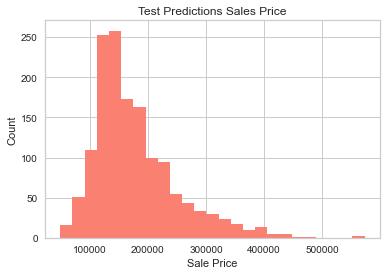

In [266]:
plt.hist(testpreds_df.SalePrice.unique(),bins=25,color='salmon');
plt.title('Test Predictions Sales Price')
plt.xlabel('Sale Price')
plt.ylabel('Count')

In [236]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

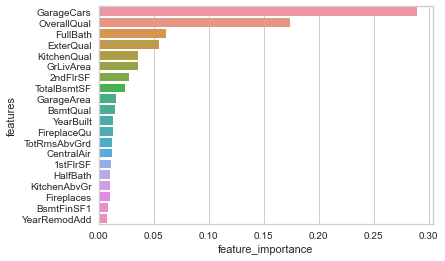

In [237]:
plot_features(X_train.columns, best_model.feature_importances_)